### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*

##### (a)

A Classification Decision Tree is a type of supervised machine learning algorithm used for classification problems. Its goal is to divide data into distinct categories or classes based on input features by asking a series of yes/no or binary questions. 

A Classification Decision Tree addresses problems where the goal is to assign categorical labels to data points based on their input features. These problems involve dividing the input space into distinct regions, each associated with a specific class.

##### Real-World Applications

1. Medical Diagnosis:

Problem: Predict whether a patient has a specific disease (e.g., "Disease" or "No Disease") based on features like age, blood pressure, and test results.
Example: Classifying patients as diabetic or non-diabetic based on glucose levels and family history.

2. Customer Segmentation:

Problem: Categorize customers into groups like "High Value", "Medium Value", or "Low Value" based on purchase history, income level, and age.
Example: E-commerce platforms targeting customers with personalized advertisements.

3. Credit Risk Assessment:

Problem: Determine if a loan applicant is "Low Risk" or "High Risk" based on financial history, credit score, and income.
Example: Banks deciding whether to approve a loan application.

##### (b)

The key difference between a Classification Decision Tree and Multiple Linear Regression lies in the nature of the predictions and the methods used to make them. Here's a detailed breakdown:

How Classification Decision Trees Make Predictions:

Structure:

1.The tree consists of nodes that represent decisions based on feature values.
2.At each node, a feature is chosen, and the data is split based on a threshold or condition (e.g., "Is age > 30?").
3.The process continues until a terminal node (leaf) is reached, representing a class label.

Prediction Type:
1.Categorical Outputs: It assigns a specific class (e.g., "Yes" or "No").
2.Based on the majority class in the leaf node or the probability distribution of classes within the node.

How Multiple Linear Regression Makes Predictions:

Model Equation:
1. Uses a linear equation to predict a continuous outcome:
𝑦^=𝛽0+𝛽1*𝑥1+𝛽2*𝑥2+⋯+𝛽𝑛*𝑥𝑛+𝜖

y^ is the predicted outcome, 𝑥𝑖 are input features, 
𝛽𝑖 are coefficients, and 𝜖 is the error term.

Prediction Type:

Continuous Outputs: It predicts numerical values (e.g., house prices, stock prices).

##### Summary of the differences:

1. Classification Decision Tree:

Target Variable: Categorical (classes)	

Prediction Type: Class label or probability

Decision Rule: Feature-based splits

Output Examples: "Spam" or "Not Spam"	

Use Case Example	Predicting email spam	Estimating housing prices

2. Multiple Linear Regression:

Target Variable: Continuous (numeric)

Prediction Type: Numeric value

Decision Rule: Decision Rule

Output Examples: Predicted house price is $250,000


### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$


1. Accuracy:

Application Scenario: General classification tasks with balanced classes and equal cost for false positives and false negatives.

Example: A basic diagnostic test for high blood pressure.

Rationale: Accuracy is appropriate when the classes (e.g., "high blood pressure" vs. "normal") are balanced (similar numbers of positive and negative cases) and misclassifications carry similar costs.

2. Sensitivity:

Application Scenario: Medical diagnosis where missing a true positive (FN) has severe consequences.

Example: Screening for cancer in early stages.

Rationale:
High sensitivity ensures that most actual cases of the disease are caught, even at the cost of some false positives.
Missing a positive case can have severe consequences, so prioritizing the detection of actual positives is critical.

3. Specificity:

Application Scenario: Applications where falsely identifying a positive case has severe consequences.

Example: Drug testing for athletes.

Rationale:
High specificity minimizes the chances of false positives, reducing unnecessary actions.
Ensuring that a negative result is truly negative is critical to maintaining fairness and credibility.

4. Precision:

Application Scenario: Applications where the cost of a false positive (FP) is high, and confidence in positive predictions is critical.

Example: Fraud detection in banking transactions.

Rationale:
High precision ensures that flagged cases are very likely to be actual fraud.
With limited resources, reducing false positives is important to avoid wasting resources on cases that turn out to be legitimate transactions.

Summary of using ChatBot for question 1 and question 2:
    
https://chatgpt.com/share/673bd947-91a4-8012-a38e-d43b205a69f7
    
We discussed the **Classification Decision Tree**, its purpose, and real-world applications. Then, we compared how it makes predictions versus **Multiple Linear Regression**, highlighting their differences in output and methodology. Lastly, we explored specific metrics (**Accuracy**, **Sensitivity**, **Specificity**, and **Precision**) and identified real-world scenarios best suited for each, along with the rationale for their application.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below


 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`


In [20]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [3]:
# Load the dataset
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Set specific data types using .loc to avoid the SettingWithCopyWarning
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the processed dataset
print(ab_reduced_noNaN.info())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None


Explanation:

Using .loc[] explicitly specifies that you want to modify a particular column, thus avoiding the SettingWithCopyWarning.

.loc[:, "column_name"] ensures that the modification is done on the whole column safely, preventing potential issues.

Summary of using ChatBot:
    
https://chatgpt.com/share/673bdb43-45a0-8012-be40-98bad4d09e03
    
We discussed preprocessing an Amazon books dataset. You were instructed to:

1. Remove the `Weight_oz`, `Width`, and `Height` columns.
2. Drop rows with missing values (`NaN`).
3. Convert `Pub year` and `NumPages` to integer types and `Hard_or_Paper` to a categorical type.


### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model
```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```

The split will be done as an 80/20 ratio, where:

80% of the data will be in the training set

20% will be in the testing set

In [ ]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

This is creating a binary target variable y, which will represent whether a book is hardcover or paperback.

The column Hard_or_Paper in the DataFrame is transformed into a dummy variable, with 'H' representing hardcover books. The target variable will be a 1 for hardcover and 0 for paperback.

In [ ]:
X = ab_reduced_noNaN[['List Price']]

This is selecting the feature (independent variable) List Price to predict whether the book is hardcover or paperback.

Training set size: 255 observations
Test set size: 64 observations


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

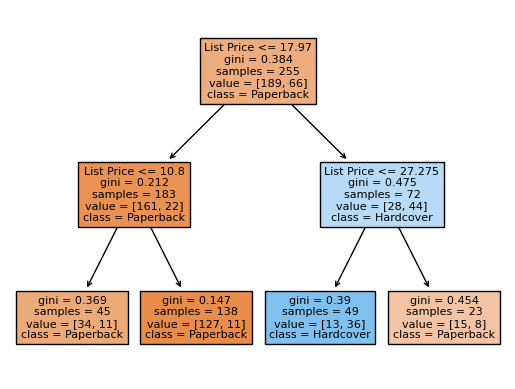

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

# Splitting the data into train and test sets (80/20 split)
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report number of observations in train and test sets
print(f"Training set size: {X_train.shape[0]} observations")
print(f"Test set size: {X_test.shape[0]} observations")

# Train the DecisionTreeClassifier model with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


Summary of Predictions Based on List Price:

If List Price <= 10.8: Predict Paperback.
If 10.8 < List Price <= 17.97: Predict Paperback.
If 17.97 < List Price <= 27.275: Predict Hardcover.
If List Price > 27.275: Predict Paperback.

Summary of using ChatBot:
    
https://chatgpt.com/share/673e87a9-b264-8012-9096-2f90d32011cb

1. **Data Preparation**:  
   - Explained the purpose of `y` (target variable: hardcover or paperback) and `X` (feature: List Price).

2. **Data Splitting**:  
   - Provided code to split the data into 80% training and 20% testing sets using `train_test_split`, and reported dataset sizes.

3. **Model Training**:  
   - Trained a `DecisionTreeClassifier` with `max_depth=2` using `List Price` to predict book type (hardcover/paperback). 

4. **Tree Visualization**:  
   - Explained predictions from the `tree.plot_tree` graph based on `List Price`, summarizing conditions at each node and predicted classes.

### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

Original column names:
Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')

Cleaned column names:
Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')
Training set observations: 256
Test set observations: 65


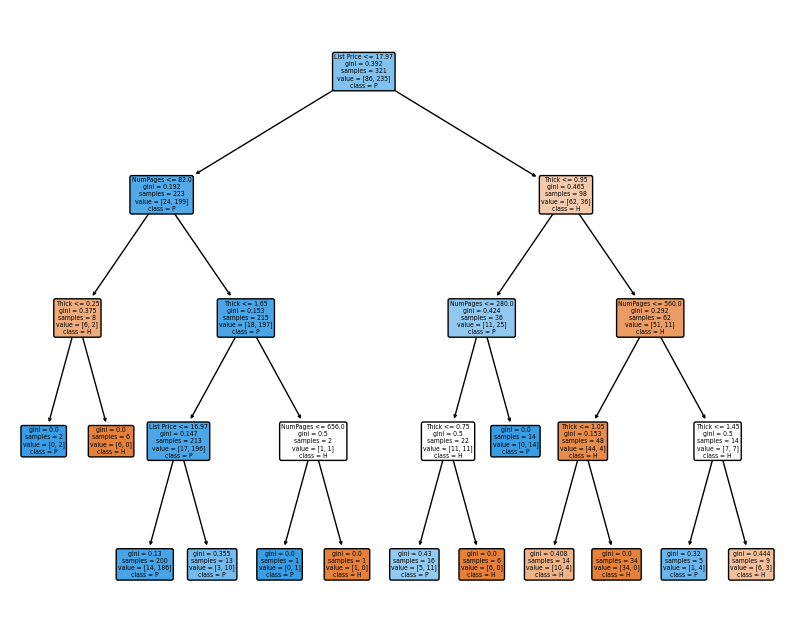

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")  # Load the dataset

# Step 1: Inspect the column names to ensure 'Hard_or_Paper' exists
print("Original column names:")
print(ab.columns)  # Print the original column names to inspect

# Strip any leading/trailing spaces from column names
ab.columns = ab.columns.str.strip()

# Print column names again after cleaning
print("\nCleaned column names:")
print(ab.columns)

# Ensure there are no missing values in the columns you're using
ab = ab.dropna(subset=['List Price', 'Hard_or_Paper', 'NumPages', 'Thick'])

# Step 2: Split the data into 80% training and 20% test
ab_train, ab_test = train_test_split(ab, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f'Training set observations: {len(ab_train)}')
print(f'Test set observations: {len(ab_test)}')

# Step 3: Select the features and the target variable
X = ab[['NumPages', 'Thick', 'List Price']]  # Features
y = ab['Hard_or_Paper']  # Target variable (hardcover or paperback)

# Step 4: Initialize and train the Decision Tree Classifier with max_depth = 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Step 5: Visualize the trained decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=clf.classes_, rounded=True)
plt.show()


Once the tree reaches its maximum depth (or another stopping condition is met, like minimum samples per leaf), each endpoint of the tree is called a leaf node.

In each leaf node, the tree makes a prediction based on the majority class of the target variable (hardcover or paperback) in that subset of the data. For example, if a leaf node contains 80% hardcover books and 20% paperback books, the prediction for that leaf node will be "hardcover."

If a new observation falls into that leaf node (based on its values for 'List Price', 'NumPages', and 'Thick'), the model predicts the class that is most common in that leaf node.

Making Predictions:

When a new book is given as input, the decision tree follows these steps:

First, it checks the value of the first feature (e.g., 'List Price') and follows the appropriate branch.

Next, it checks the value of the second feature (e.g., 'NumPages') and again follows the relevant branch.

This process continues until the tree reaches a leaf node.

The prediction is made based on the majority class in that leaf node (either hardcover or paperback).

Examples：

If a book has a list price of $15, 300 pages, and a thickness of 1 inch, the decision tree might follow this path:

Is the list price greater than $20? No → Follow left branch.

Are the pages greater than 250? Yes → Follow right branch.

The tree then reaches a leaf node, where it predicts the book is a paperback (based on the majority class in that leaf).

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")  # Load the dataset

# Step 1: Inspect the column names to ensure 'Hard_or_Paper' exists
print("Original column names:")
print(ab.columns)  # Print the original column names to inspect

# Strip any leading/trailing spaces from column names
ab.columns = ab.columns.str.strip()

# Step 2: Ensure there are no missing values in the columns you're using
ab = ab.dropna(subset=['List Price', 'Hard_or_Paper', 'NumPages', 'Thick'])

# Step 3: Split the data into 80% training and 20% test
ab_train, ab_test = train_test_split(ab, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f'Training set observations: {len(ab_train)}')
print(f'Test set observations: {len(ab_test)}')

# Step 4: Select the features and the target variable
X_train = ab_train[['List Price']]  # Features for training (only using 'List Price')
y_train = ab_train['Hard_or_Paper']  # Target variable for training

X_test = ab_test[['List Price']]  # Features for testing (only using 'List Price')
y_test = ab_test['Hard_or_Paper']  # Target variable for testing

# Step 5: Initialize and train the Decision Tree Classifiers
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train, y_train)  # Train clf with max_depth=4
clf2.fit(X_train, y_train)  # Train clf2 with max_depth=2

# Step 6: Make predictions for both models on the test set
y_pred_clf = clf.predict(X_test)  # Predictions from clf
y_pred_clf2 = clf2.predict(X_test)  # Predictions from clf2

# Step 7: Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()

# Step 8: Sensitivity, Specificity, and Accuracy for clf
sensitivity_clf = tp_clf / (tp_clf + fn_clf)  # True Positive Rate
specificity_clf = tn_clf / (tn_clf + fp_clf)  # True Negative Rate
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Sensitivity, Specificity, and Accuracy for clf2
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)  # True Positive Rate
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)  # True Negative Rate
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Step 9: Reporting the results
print("For clf (Decision Tree with max_depth=4):")
print(f"Confusion Matrix:\n{cm_clf}")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nFor clf2 (Decision Tree with max_depth=2):")
print(f"Confusion Matrix:\n{cm_clf2}")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Original column names:
Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')
Training set observations: 256
Test set observations: 65
For clf (Decision Tree with max_depth=4):
Confusion Matrix:
[[14  5]
 [ 7 39]]
Sensitivity: 0.85
Specificity: 0.74
Accuracy: 0.82

For clf2 (Decision Tree with max_depth=2):
Confusion Matrix:
[[14  5]
 [ 5 41]]
Sensitivity: 0.89
Specificity: 0.74
Accuracy: 0.85


Summary of using ChatBot for question 5 and question 6:

https://chatgpt.com/share/673ec215-d098-8012-955c-2df26683b04d

We worked on training two Decision Tree classifiers (`clf` and `clf2`) using the "amazonbooks.csv" dataset, focusing on predicting the book type (hardcover/paperback) based on the "List Price" feature. After cleaning the dataset, we split it into training and test sets. We trained both models with different depths, made predictions, and then evaluated them using confusion matrices, sensitivity, specificity, and accuracy. The code was debugged and refined to ensure proper model training and evaluation.

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better
```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```

The differences between the two confusion matrices are caused by the features used for prediction: the first matrix relies only on the `List Price`, which may not fully explain the target variable `life_exp_good`, leading to more misclassifications. The second matrix adds `NumPages` and `Thick`, providing the model with more information to make better predictions. These additional features likely capture important patterns that `List Price` alone misses, resulting in fewer errors. The confusion matrices for clf and clf2 are better because The clf and clf2 models are trained with features that are more relevant to distinguishing between the book types, leading to more accurate and reliable predictions.

Summary of using ChatBoot:
    
https://chatgpt.com/share/673ec215-d098-8012-955c-2df26683b04d
    
1. We compared two decision tree models: one using only `List Price` and the other using `NumPages`, `Thick`, and `List Price`.
2. The second model, with more features, performed better due to the additional information.
3. We examined confusion matrices and concluded that more features improved classification accuracy. 

### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*

To visualize the feature importances in `scikit-learn` classification decision trees, you can use the `.feature_importances_` attribute available after fitting the model. For `clf2`, this can be done as follows:

1. **Fit the Decision Tree Model (clf2)**:
   After training the decision tree, you can access the feature importances directly from the model.

2. **Visualize the Feature Importances**:
   You can plot the feature importances using `matplotlib` for better insight.

Here’s the code to visualize the feature importances for `clf2`:


In [ ]:
import matplotlib.pyplot as plt

# Visualize the feature importances of clf2
plt.barh(clf2.feature_names_in_, clf2.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances for clf2")
plt.show()

# Report which predictor variable is most important
most_important_feature = clf2.feature_names_in_[clf2.feature_importances_.argmax()]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")


Explanation:

- `clf2.feature_importances_` gives a list of importance scores for each feature used in the model.
- `clf2.feature_names_in_` provides the names of the features used in the model, which can be paired with the importance scores.
- The `argmax()` function returns the index of the feature with the highest importance score, allowing us to identify the most important predictor variable.

Using ChatBot(in the same chatbot box wiith question 6 and 7):
    
https://chatgpt.com/share/673ec215-d098-8012-955c-2df26683b04d

You asked how to visualize feature importances for a decision tree model (`clf2`). I explained feature importances and provided corrected code to visualize them using a bar chart, highlighting the most important predictor variable for the model.

### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, coefficients represent the estimated change in the outcome variable for a one-unit increase in the predictor, assuming all other predictors are held constant. This interpretation depends on the linear relationship and requires careful attention to multicollinearity. In decision trees, feature importances indicate how often and effectively a feature is used to split the data, reflecting its contribution to reducing the model’s overall error but without providing a direct causal interpretation.

Summary of using ChatBot:

https://chatgpt.com/share/673ece99-405c-8012-9f9c-fab79997a875

We compared linear regression coefficients and decision tree feature importances in interpretation.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes